# ***IMPORTING LIBRARIES***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bank = pd.read_excel("/content/DEXINUS (1).xls",skiprows=range(0,10))

In [ ]:
bank.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
bank.dtypes

observation_date    datetime64[ns]
DEXINUS                    float64
dtype: object

In [ ]:
bank['DEXINUS'].isnull().values.any()

True

In [ ]:
bank['DEXINUS'].isnull().sum()

494

In [ ]:
bank.dropna(subset=['DEXINUS'],inplace=True)

In [ ]:
print(bank)

      observation_date  DEXINUS
0           1973-01-02     8.02
1           1973-01-03     8.02
2           1973-01-04     8.00
3           1973-01-05     8.01
4           1973-01-08     8.00
...                ...      ...
12644       2021-06-21    74.18
12645       2021-06-22    74.37
12646       2021-06-23    74.13
12647       2021-06-24    74.14
12648       2021-06-25    74.14

[12155 rows x 2 columns]


In [ ]:
bank['DEXINUS'].isnull().values.any()

False

In [ ]:
#cleaning up the data
bank.columns=["observation_date","DEXINUS"]
bank.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
bank.tail()

,observation_date,DEXINUS
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12155 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12155 non-null  datetime64[ns]
 1   DEXINUS           12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 284.9 KB


In [ ]:
bank.shape

(12155, 2)

In [ ]:
bank["DEXINUS"].mean()

34.20613320444257

In [ ]:
bank.isnull().sum()

observation_date    0
DEXINUS             0
dtype: int64

In [ ]:
bank.describe()

,DEXINUS
count,12155.000000
mean,34.206133
std,21.089190
min,7.190000
25%,12.075000
50%,35.890000
75%,47.650000
max,76.950000


In [ ]:
def change_into_datetime(col):
    bank[col]=pd.to_datetime(bank[col])

In [ ]:
for i in ['observation_date']:
    change_into_datetime(i)

In [ ]:
bank.dtypes

observation_date    datetime64[ns]
DEXINUS                    float64
dtype: object

In [ ]:
bank['Day']= bank['observation_date'].dt.day
bank['Month']= bank['observation_date'].dt.month
bank['Year']= bank['observation_date'].dt.year

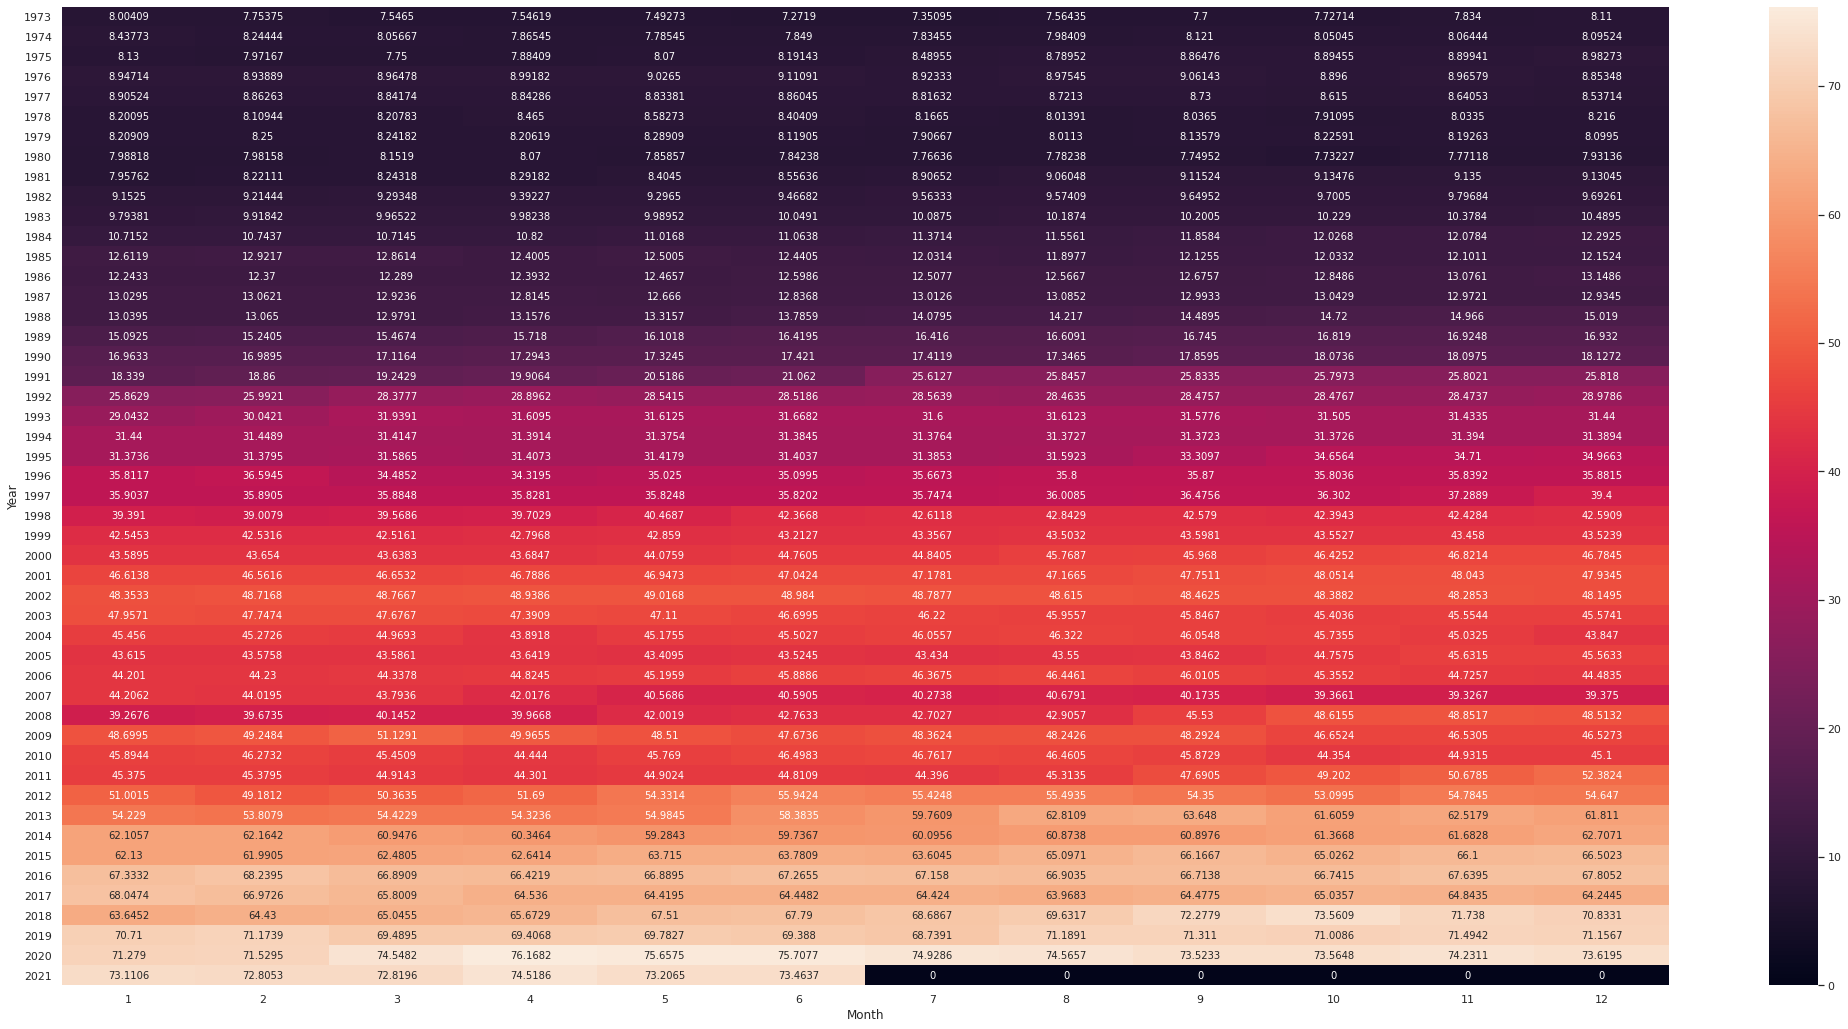

In [ ]:
plt.figure(figsize=(36,18))
heatmap_y_month = pd.pivot_table(data=bank,values="DEXINUS",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") 

In [ ]:
#Correlation
bank.corr()

,DEXINUS,Day,Month,Year
DEXINUS,1.000000,-0.001639,0.008699,0.971633
Day,-0.001639,1.000000,0.004498,-0.004374
Month,0.008699,0.004498,1.000000,-0.013944
Year,0.971633,-0.004374,-0.013944,1.000000


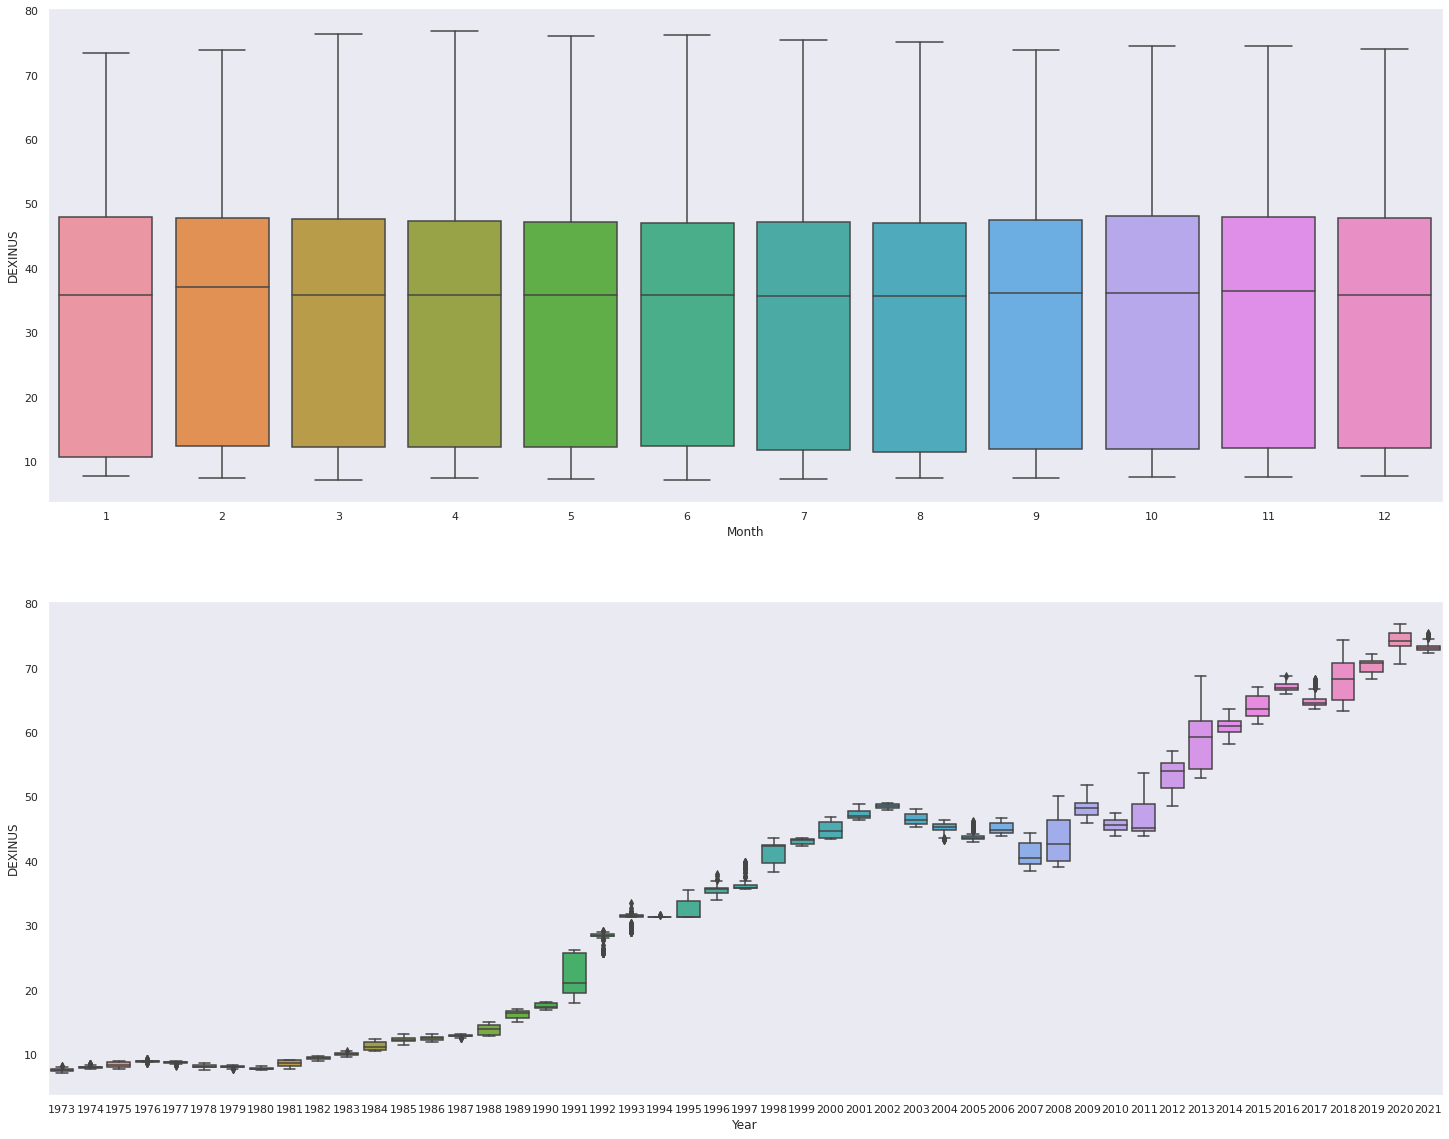

In [ ]:
plt.figure(figsize=(25,20))
plt.subplot(211)
sns.boxplot(x="Month",y="DEXINUS",data=bank)
plt.subplot(212)
sns.boxplot(x="Year",y="DEXINUS",data=bank)


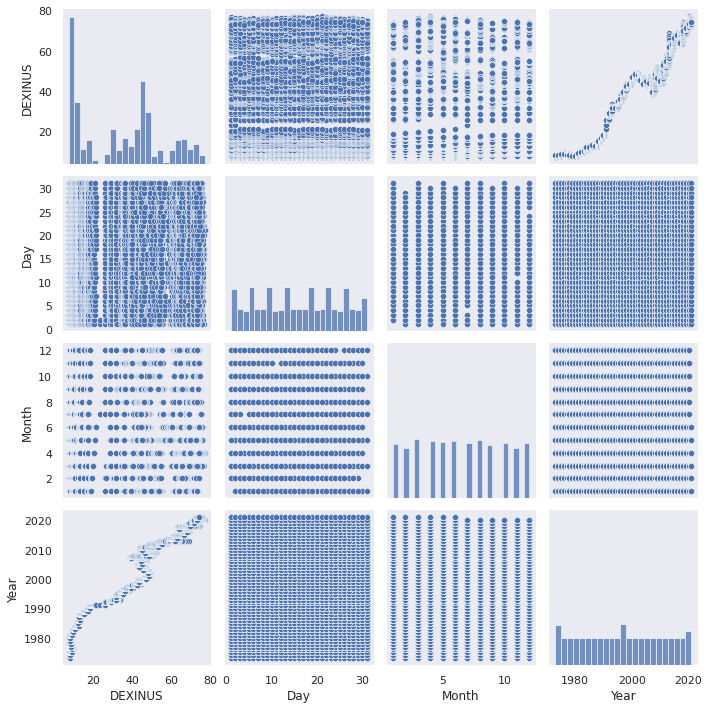

In [ ]:
sns.pairplot(bank)

In [ ]:
bank.describe()

,DEXINUS,Day,Month,Year
count,12155.000000,12155.000000,12155.000000,12155.000000
mean,34.206133,15.769231,6.472892,1996.753023
std,21.089190,8.773200,3.418337,13.982154
min,7.190000,1.000000,1.000000,1973.000000
25%,12.075000,8.000000,4.000000,1985.000000
50%,35.890000,16.000000,6.000000,1997.000000
75%,47.650000,23.000000,9.000000,2009.000000
max,76.950000,31.000000,12.000000,2021.000000


# *TIME SERIES PLOT*

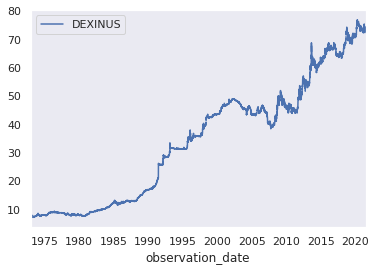

In [ ]:
bank =pd.read_excel('/content/DEXINUS (1).xls', skiprows=range(0,10),header=0, index_col=0,parse_dates=True)
bank.plot()

In [ ]:
bank['DEXINUS'].isnull().values.any()

True

In [ ]:
bank['DEXINUS'].isnull().sum()

494

In [ ]:
bank.dropna(subset=['DEXINUS'],inplace=True)

In [ ]:
print(bank)

                  DEXINUS
observation_date         
1973-01-02           8.02
1973-01-03           8.02
1973-01-04           8.00
1973-01-05           8.01
1973-01-08           8.00
...                   ...
2021-06-21          74.18
2021-06-22          74.37
2021-06-23          74.13
2021-06-24          74.14
2021-06-25          74.14

[12155 rows x 1 columns]


In [ ]:
bank['DEXINUS'].isnull().values.any()

False

# **TIME SERIES DECOMPOSITION PLOT**

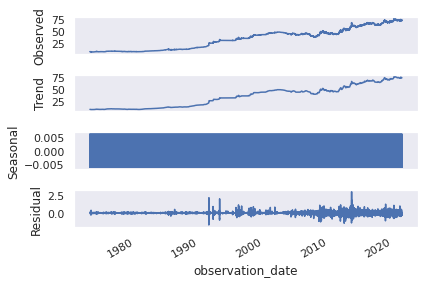

In [ ]:
decompose_ts_add = seasonal_decompose(bank.DEXINUS,freq=12)
decompose_ts_add.plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31f8e16650>]],
      dtype=object)

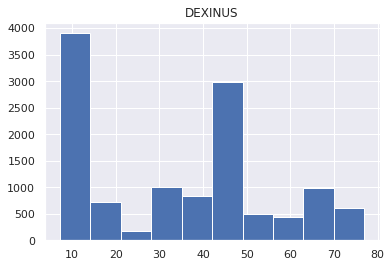

In [ ]:
bank.hist()

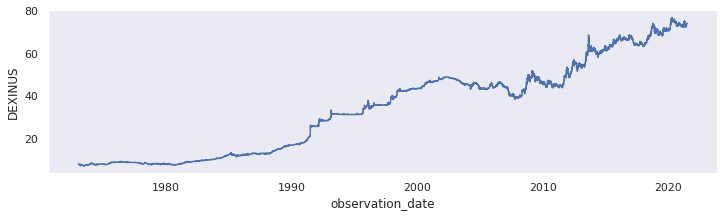

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="observation_date",y="DEXINUS",data=bank)

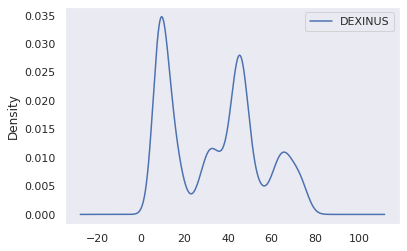

In [ ]:
bank.plot(kind='kde') ###Kernel Density Plot

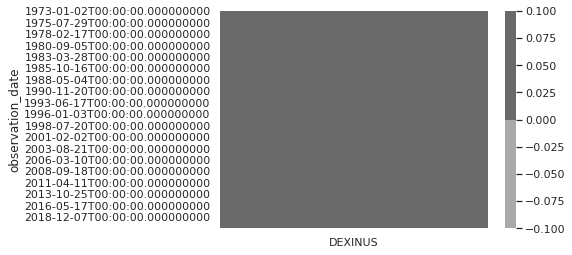

In [ ]:
cols = bank.columns 
colours = ['darkgray', 'dimgrey'] 
sns.heatmap(bank[cols].isnull(),
            cmap=sns.color_palette(colours))

# ***ACF & PACF plot***

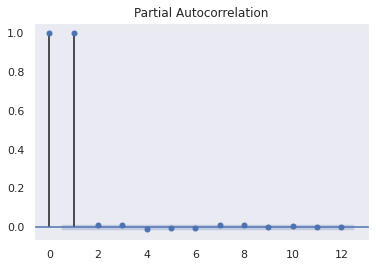

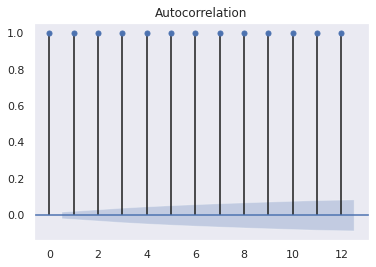

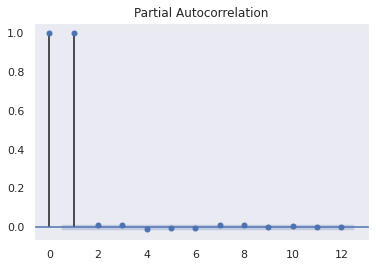

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(bank.DEXINUS,lags=12)
tsa_plots.plot_pacf(bank.DEXINUS,lags=12)

In [ ]:
#z score to find outliers
def zscore(x):
    z = ((x-34.30)/21.11)
    return z

In [ ]:
zscore(bank['DEXINUS'])

observation_date
1973-01-02   -1.244908
1973-01-03   -1.244908
1973-01-04   -1.245855
1973-01-05   -1.245381
1973-01-08   -1.245855
                ...   
2021-06-21    1.889152
2021-06-22    1.898153
2021-06-23    1.886784
2021-06-24    1.887257
2021-06-25    1.887257
Name: DEXINUS, Length: 12155, dtype: float64

In [ ]:
#check zscore over 3 & -3 for outliers
X = zscore(bank['DEXINUS'])
for i in X:
    if i>3 or i<-3:
        print (i)

{'boxes': [<matplotlib.lines.Line2D at 0x7f31f63ffc10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f31f6406c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f31f640dc90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f31f640d750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f31f64061d0>,
  <matplotlib.lines.Line2D at 0x7f31f6406710>]}

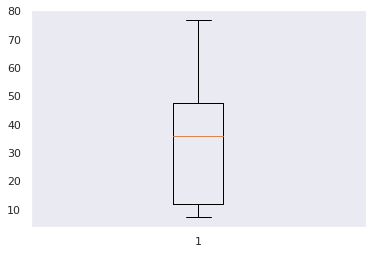

In [ ]:
plt.boxplot(bank['DEXINUS'])

# ***INTRODUCTION TO STATIONARY & NON-STATIONARY SERIES***

In [ ]:
test_result = adfuller(bank['DEXINUS'])
test_result

(0.6272023920144257,
 0.9882672785289222,
 39,
 12115,
 {'1%': -3.4308898832931316,
  '10%': -2.5668970022171957,
  '5%': -2.8617786008879005},
 -7302.205873900686)

In [ ]:
def adfuller_test(DEXINUS):
    result=adfuller(DEXINUS)
    labels=['ADF Test Statistic', 'p-values','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1]<=0.05:
            print("Reject the null hypothesis(H0).Data is stationary")
        else:
                print("Accept the null hypothesis(H0).Data is non-stationary")

In [ ]:
adfuller_test(bank['DEXINUS'])

ADF Test Statistic : 0.6272023920144257
Accept the null hypothesis(H0).Data is non-stationary
p-values : 0.9882672785289222
Accept the null hypothesis(H0).Data is non-stationary
#Lags Used : 39
Accept the null hypothesis(H0).Data is non-stationary
Number of Observations Used : 12115
Accept the null hypothesis(H0).Data is non-stationary


In [ ]:
bank['diff_1']=bank['DEXINUS'].diff(periods = 1)
bank

,DEXINUS,diff_1
observation_date,,
1973-01-02,8.02,NaN
1973-01-03,8.02,0.00
1973-01-04,8.00,-0.02
1973-01-05,8.01,0.01
1973-01-08,8.00,-0.01
...,...,...
2021-06-21,74.18,0.04
2021-06-22,74.37,0.19
2021-06-23,74.13,-0.24


In [ ]:
adfuller_test(bank['diff_1'].dropna())

ADF Test Statistic : -17.822806582003683
Reject the null hypothesis(H0).Data is stationary
p-values : 3.1560177473483846e-30
Reject the null hypothesis(H0).Data is stationary
#Lags Used : 40
Reject the null hypothesis(H0).Data is stationary
Number of Observations Used : 12113
Reject the null hypothesis(H0).Data is stationary


# ***Upsampling Data***

In [ ]:
# upsample 
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [ ]:
dataset = read_csv('/content/DEXINUS (1).csv', header=0, index_col=0, parse_dates=True,squeeze=True)

In [ ]:
dataset

observation_date
1973-02-01     8.02
1973-03-01     8.02
1973-04-01     8.00
1973-05-01     8.01
1973-08-01     8.00
              ...  
2021-06-21    74.18
2021-06-22    74.37
2021-06-23    74.13
2021-06-24    74.14
2021-06-25    74.14
Name: DEXINUS, Length: 12649, dtype: float64

In [ ]:
upsampled = dataset.resample('D').mean()
print(upsampled.head(32))

observation_date
1973-01-02    8.00
1973-01-03    7.55
1973-01-04     NaN
1973-01-05    7.54
1973-01-06    7.25
1973-01-07     NaN
1973-01-08    7.49
1973-01-09     NaN
1973-01-10    7.72
1973-01-11    7.68
1973-01-12     NaN
1973-01-13     NaN
1973-01-14     NaN
1973-01-15    8.00
1973-01-16    8.01
1973-01-17    8.01
1973-01-18    8.01
1973-01-19    8.00
1973-01-20     NaN
1973-01-21     NaN
1973-01-22    8.00
1973-01-23    8.00
1973-01-24    8.00
1973-01-25    8.00
1973-01-26    8.00
1973-01-27     NaN
1973-01-28     NaN
1973-01-29    8.01
1973-01-30    8.00
1973-01-31    8.00
1973-02-01    8.02
1973-02-02    8.00
Freq: D, Name: DEXINUS, dtype: float64


# **interpolate the missing value**

observation_date
1973-01-02    8.000000
1973-01-03    7.550000
1973-01-04    7.545000
1973-01-05    7.540000
1973-01-06    7.250000
1973-01-07    7.370000
1973-01-08    7.490000
1973-01-09    7.605000
1973-01-10    7.720000
1973-01-11    7.680000
1973-01-12    7.760000
1973-01-13    7.840000
1973-01-14    7.920000
1973-01-15    8.000000
1973-01-16    8.010000
1973-01-17    8.010000
1973-01-18    8.010000
1973-01-19    8.000000
1973-01-20    8.000000
1973-01-21    8.000000
1973-01-22    8.000000
1973-01-23    8.000000
1973-01-24    8.000000
1973-01-25    8.000000
1973-01-26    8.000000
1973-01-27    8.003333
1973-01-28    8.006667
1973-01-29    8.010000
1973-01-30    8.000000
1973-01-31    8.000000
1973-02-01    8.020000
1973-02-02    8.000000
1973-02-03    7.790000
1973-02-04    7.580000
1973-02-05    7.520000
1973-02-06    7.410000
1973-02-07    7.300000
1973-02-08    7.490000
1973-02-09    7.635000
1973-02-10    7.780000
Freq: D, Name: DEXINUS, dtype: float64


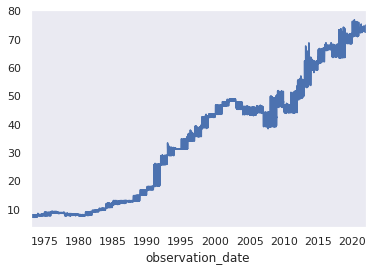

In [ ]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(40))
interpolated.plot()
pyplot.show()

# *Downsampling Data*

In [ ]:
# downsample
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [ ]:
resample = dataset.resample('Q')
quarterly_mean_DEXINUS = resample.mean()

**Tranformations**

In [ ]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot

In [ ]:
dataset = read_csv('/content/DEXINUS (1).csv', header=0, index_col=0, parse_dates=True)

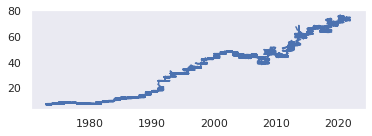

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataset)

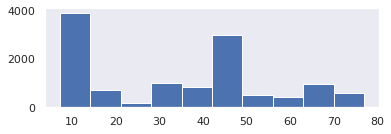

In [ ]:
# histogram
pyplot.subplot(212)
pyplot.hist(dataset['DEXINUS'])
pyplot.show()

# ***Square Root Transform***

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [ ]:
dataframe = DataFrame(dataset.values)
dataframe.columns = ['DEXINUS']
dataframe['DEXINUS'] = sqrt(dataframe['DEXINUS'])

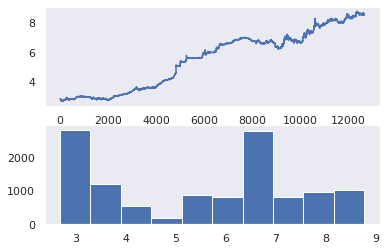

In [ ]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['DEXINUS'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['DEXINUS'])
pyplot.show()

# **Log Transform**

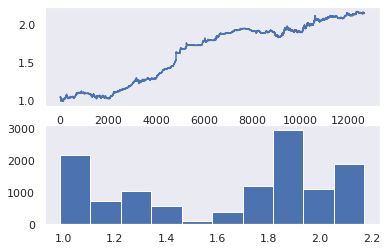

In [ ]:
from numpy import log
dataframe = DataFrame(dataset.values)
dataframe.columns = ['DEXINUS']
dataframe['DEXINUS'] = log(dataframe['DEXINUS'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['DEXINUS'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['DEXINUS'])
pyplot.show()

observation_date
1973-03-31    7.705517
1973-06-30    7.509355
1973-09-30    7.599844
1973-12-31    7.806613
1974-03-31    8.142787
Freq: Q-DEC, Name: DEXINUS, dtype: float64


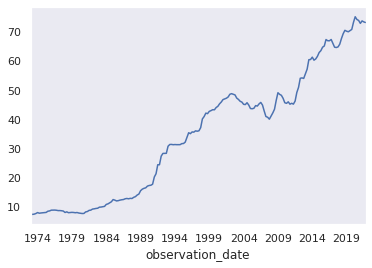

In [ ]:
print(quarterly_mean_DEXINUS.head())
quarterly_mean_DEXINUS.plot()
pyplot.show()

# SPEED UP EDA *PROCESS*

In [ ]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

     |████████████████████████████████| 252 kB 15.1 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |████████████████████████████████| 3.1 MB 57.9 MB/s 
     |████████████████████████████████| 675 kB 60.3 MB/s 
     |████████████████████████████████| 812 kB 67.0 MB/s 
     |████████████████████████████████| 28.5 MB 45 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6cd0b8f6a490dfd9432ec6c78374ebb32dd1320fcd49d34f2491985cfdc1a731
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=7a2675b50e2d3daedab53a74e68fa40487525ebbf6f6dd835673e55ed8471ec6
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

     |████████████████████████████████| 15.1 MB 130 kB/s 


In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
EDA_report= pp.ProfileReport(bank)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA DRIVEN MODEL 

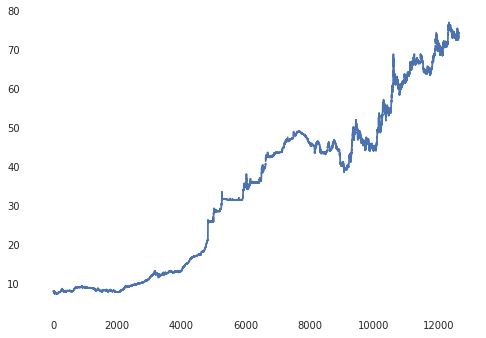

In [ ]:
bank = pd.read_csv("/content/DEXINUS (1).csv")
bank.DEXINUS.plot()

In [ ]:
print(bank)

      observation_date  DEXINUS
0           02-01-1973     8.02
1           03-01-1973     8.02
2           04-01-1973     8.00
3           05-01-1973     8.01
4           08-01-1973     8.00
...                ...      ...
12644       21-06-2021    74.18
12645       22-06-2021    74.37
12646       23-06-2021    74.13
12647       24-06-2021    74.14
12648       25-06-2021    74.14

[12649 rows x 2 columns]


In [ ]:
bank.dropna(subset=['DEXINUS'],inplace=True)

In [ ]:
print(bank)

      observation_date  DEXINUS
0           02-01-1973     8.02
1           03-01-1973     8.02
2           04-01-1973     8.00
3           05-01-1973     8.01
4           08-01-1973     8.00
...                ...      ...
12644       21-06-2021    74.18
12645       22-06-2021    74.37
12646       23-06-2021    74.13
12647       24-06-2021    74.14
12648       25-06-2021    74.14

[12155 rows x 2 columns]


In [ ]:
bank['DEXINUS'].isnull().values.any()

False

In [ ]:
bank.isnull().sum()

observation_date    0
DEXINUS             0
dtype: int64

## ***SPLITTING DATA***

In [ ]:
Train = bank.head(147)
Test = bank.tail(12)

## ***Moving Average***

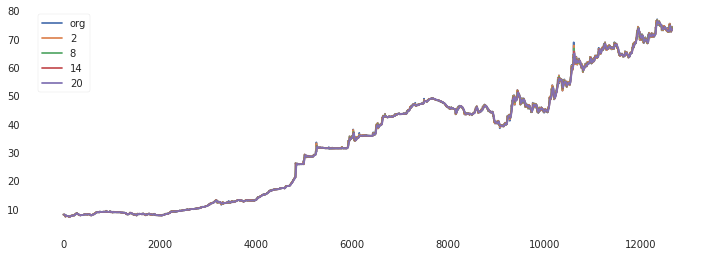

In [ ]:
plt.figure(figsize=(12,4))
bank.DEXINUS.plot(label="org")
for i in range(2,24,6):
    bank["DEXINUS"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# ***Time series decomposition plot***

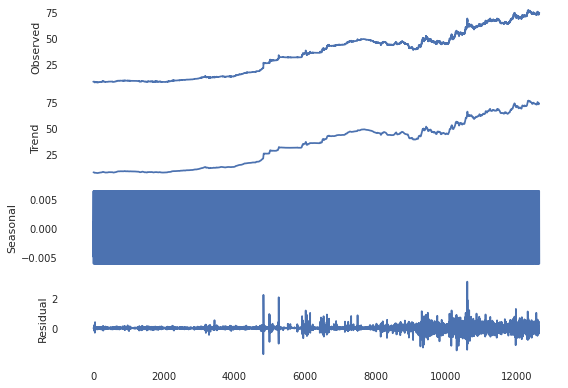

In [ ]:
decompose_ts_add = seasonal_decompose(bank.DEXINUS,freq=12)
decompose_ts_add.plot()
plt.show()

***ACF plots and PACF plots***


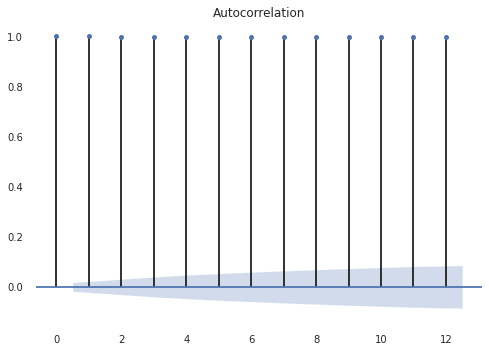

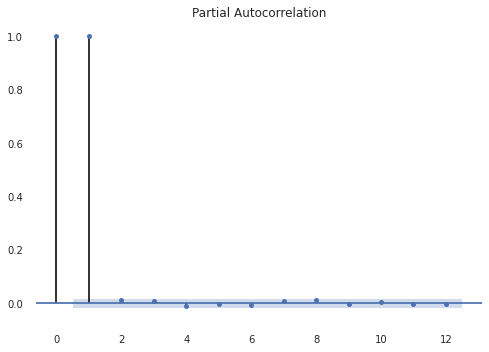

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(bank.DEXINUS,lags=12)
tsa_plots.plot_pacf(bank.DEXINUS,lags=12)
plt.show()


# ***Evaluation Metric***

In [ ]:
def rmse(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
######Simple Exponential Method######
ses_model = SimpleExpSmoothing(Train["DEXINUS"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse(pred_ses,Test.DEXINUS) 

89.8682680791684

In [ ]:
######Holt method#####
hw_model = Holt(Train["DEXINUS"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse(pred_hw,Test.DEXINUS) 

79.19865190578571

In [ ]:
####Holts winter exponential smoothing with additive seasonality and additive trend###
hwe_model_add_add = ExponentialSmoothing(Train["DEXINUS"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse(pred_hwe_add_add,Test.DEXINUS) 

89.83427633059381

In [ ]:
######Holts winter exponential smoothing with multiplicative seasonality and additive trend#####
hwe_model_mul_add = ExponentialSmoothing(Train["DEXINUS"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[1])
rmse(pred_hwe_mul_add,Test.DEXINUS) 

89.73628505240148

# ***Final Model by combining train and test***

In [ ]:
hwe_model_add_add = ExponentialSmoothing(bank["DEXINUS"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [ ]:
#Forecasting for next 30 time periods
hwe_model_add_add.forecast(30)

12155    74.149498
12156    74.174300
12157    74.159268
12158    74.177471
12159    74.208406
12160    74.201632
12161    74.223253
12162    74.232267
12163    74.217878
12164    74.226678
12165    74.233264
12166    74.221813
12167    74.231932
12168    74.256754
12169    74.241697
12170    74.259913
12171    74.290875
12172    74.284086
12173    74.305723
12174    74.314739
12175    74.300326
12176    74.309129
12177    74.315714
12178    74.304243
12179    74.314365
12180    74.339207
12181    74.324127
12182    74.342354
12183    74.373343
12184    74.366539
dtype: float64